## Simple LQR in-class example

Sawyer B. Fuller, 2020.01.12

Boilerplate imports

In [2]:
import numpy as np
from numpy import array as arr
import matplotlib.pyplot as plt
import control

Dynamics system: m * x_ddot = -b * x_dot + u 

In [3]:

m = 1
b = .1

A = arr(((0, 1),(0, -b/m)))
B = arr((0, 1/m)).reshape(-1,1) # use reshape to create a column vector

Check controllability

In [8]:
ctrb = control.ctrb(A, B) # or can use np.hstack((B, A@B))
print(np.linalg.det(ctrb)) # gives nonzero answer => full rank => is controllable

-1.0


construct weight matrices and LQR state feedback matrix

In [9]:
Q = arr(((1/.01**2, 0),(0, 1/.1**2)))
R = 1
K, S, E = control.lqr(A, B, Q, R)
print(K)

[[100.          17.22079675]]


Simulate

Text(0, 0.5, 'displacement (m)')

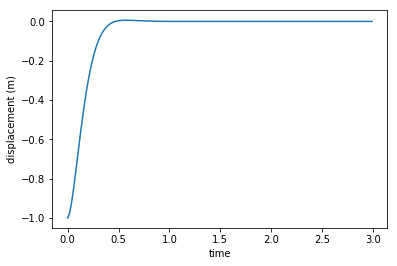

In [10]:
dt = 0.01
time = np.arange(0, 3, dt)
q_data = np.zeros((len(time), 2)) # log of state vector
q = np.array((-1, 0)) # initial condition

for idx, t in enumerate(time):
    qdot = A@q + B@(-K)@q
    q = q + dt * qdot
    q_data[idx,:] = q
plt.plot(time, q_data[:,0])
plt.xlabel('time'); plt.ylabel('displacement (m)')

Now track x = sin(3t) if t > 0.5

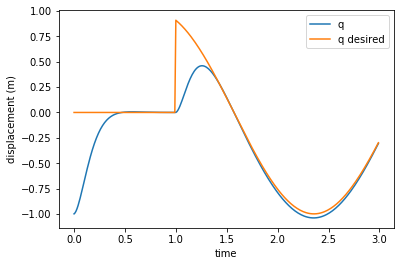

In [11]:
def q_desired(t):
    if t < 1:
        return arr((0, 0))
    else:
        return arr((np.sin(2*t), 2*np.cos(2*t))) # [position, velocity]

q_desired_data = np.zeros((len(time), 2)) # log of desired state vector  
q = np.array((-1, 0)) # initial condition
for idx, t in enumerate(time):
    error_q = q - q_desired(t)
    qdot = A@q + B@(-K)@error_q
    q = q + dt * qdot
    q_data[idx,:] = q
    q_desired_data[idx,:] = q_desired(t)
plt.plot(time, q_data[:,0], time, q_desired_data[:,0])
plt.xlabel('time'); plt.ylabel('displacement (m)')
plt.legend(('q', 'q desired'))